In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [3]:
import matplotlib.pyplot as plt

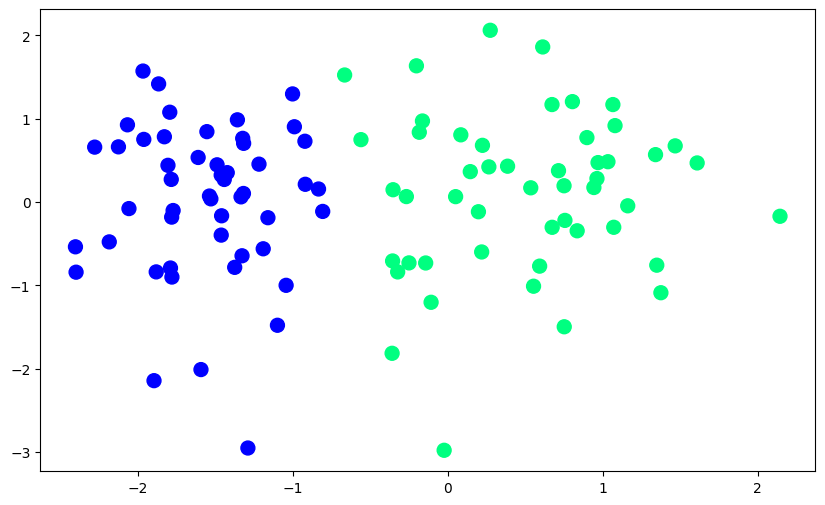

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [5]:
def step(z):
    return 1 if z>0 else 0


In [6]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
intercept_

1.0

In [9]:
coef_

array([1.36750265, 0.05978913])

In [10]:
m= -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])


In [11]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input+b

(-3.0, 3.0)

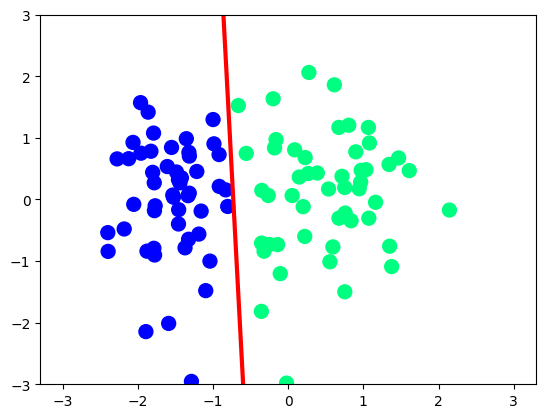

In [22]:

plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,3)

In [23]:
def perceptron(X,y):
    m = []
    b= []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [24]:
m,b = perceptron(X,y)

In [16]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

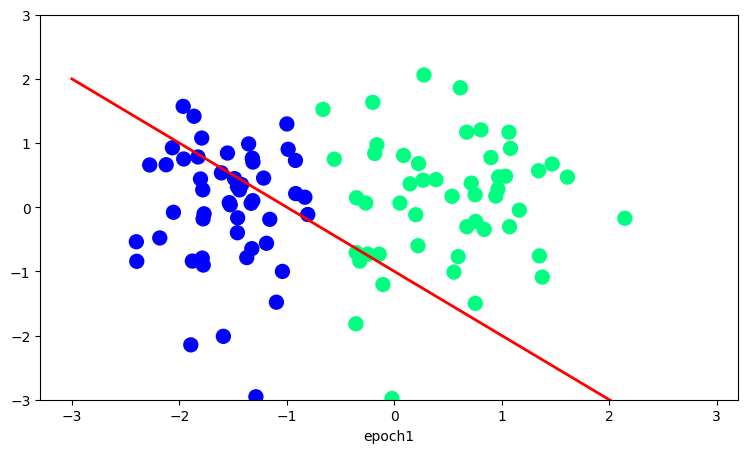

In [25]:
fig,ax = plt.subplots(figsize=(9,5))
X_i = np.arange(-3,3,0.1)
y_i = X_i*m[0]+b[0]

ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line,  = ax.plot(X_i,y_i,'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epoch{0}'.format(i+1)
    line.set_ydata(X_i*m[i] + b[i])
    ax.set_xlabel(label)



anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)
